<a href="https://www.kaggle.com/code/joeferndz/supervised-machine-learning-models-insurance-data?scriptVersionId=141119439" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Related Notebooks Published
### EDA for Insurance Dataset is here

Thank You for visiting my notebook. If you are looking for EDA information, please review this notebook.

https://www.kaggle.com/code/joeferndz/exploratory-data-analysis-eda-insurance-dataset


### Tensorflow - Binary Cross Entropy is here:

https://www.kaggle.com/code/joeferndz/tensorflow-binarycrossentropy-tensorboard

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imbalanced-data-practice/sample_submission.csv
/kaggle/input/imbalanced-data-practice/aug_test.csv
/kaggle/input/imbalanced-data-practice/aug_train.csv


## Problem Statement

### Context :

Insurance companies that sell life, health, and property and casualty insurance are using machine learning (ML) to drive improvements in customer service, fraud detection, and operational efficiency. The data provided by an Insurance company which is not excluded from other companies to getting advantage of ML. This company provides Health Insurance to its customers. We can build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

### Goal : Predict if the policyholders (customers) will be interested in Vehicle Insurance

Reference: https://www.kaggle.com/datasets/arashnic/imbalanced-data-practice

## Task:

> #### 1. Perform an Exploratory Data Analysis and visualize the data
> #### 2. Apply Machine Learning Models learned in the class and make predictions
> #### 3. Provide conclusion based on the results
> #### 4. Outline an approach to convert the learning into a business solution
> 
## Available Datasets:
> Use `aug_train.csv` as Training dataset to apply various ML models
>
> Use `aug_test.csv` as Test dataset to validate the accuracy of the ML models 

## Detailed EDA here

If you are looking for a detailed EDA, please visit this link.

https://www.kaggle.com/code/joeferndz/exploratory-data-analysis-eda-insurance-dataset

I will be doing basic EDA and going directly into feature engineering in this notebook

## Packages Loaded

In [2]:
# Import required Python Packages to perform exploratory data analysis and visualize the data
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import randint

# To split the dataset into Training and Test dataset
# We will NOT use the given aug_test.csv file in this notebook
# If you want to use that, please feel free to explore more with that dataset
# I will provide enough information for you to explore that dataset

from sklearn.model_selection import train_test_split

# To calculate statistics of the model

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

# For Feature Engineering tasks

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# sklearn Models that will be used in this notebook

# Unsupervised Machine Learning Models (dataset is labeled but we want to understand the data in more details)
from sklearn.cluster import KMeans                       # K Means (will do some clustering to just learn usage)

# Supervised Machine Learning Models

from sklearn import linear_model                         # Linear regression
from sklearn.linear_model import LogisticRegression      # Logistic regression

from sklearn.neighbors import KNeighborsClassifier       # K Nearest Neighbor Classifier

# Trees , Forests, and more Trees for us to explore

from sklearn.tree import DecisionTreeClassifier          # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier      # Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV   # Randomized Search CV for Hyperparameter tuning
from sklearn.ensemble import ExtraTreesClassifier        # Extra Tree Classifier

# 
from sklearn.naive_bayes import GaussianNB               # Naive Bayes Classifier

For quick reference, here is a very good view of some of the various machine learing models

For source: Pleaes refer to AnalyticsVidya (https://www.analyticsvidhya.com). 

I have learned a great deal from their website. It has a wealth of information for you to explore.

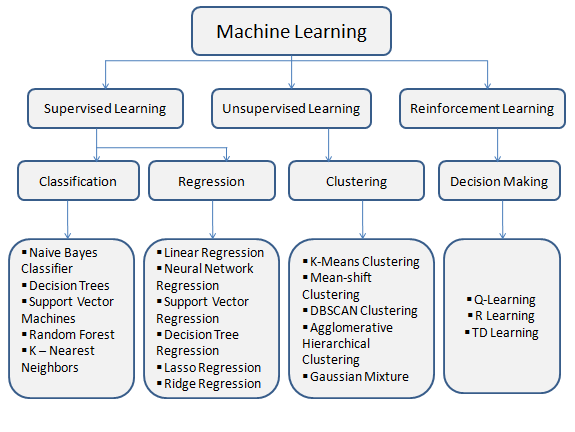

Reference : https://www.analyticsvidhya.com/blog/2021/03/everything-you-need-to-know-about-machine-learning/

## Read into Pandas DataFrame

In [3]:
# Let's load the data into Pandas Dataframe

df_train = pd.read_csv("/kaggle/input/imbalanced-data-practice/aug_train.csv")

df_train_copy = df_train.copy(deep=True)

## Basic Checks on Dataframe

In [4]:
# Let's look at the first 10 rows
df_train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
5,295775,Female,25,1,25.0,1,< 1 Year,No,27954.0,152.0,23,0
6,71711,Male,51,1,8.0,0,1-2 Year,Yes,2630.0,26.0,209,0
7,331781,Male,38,1,28.0,1,1-2 Year,No,2630.0,26.0,51,0
8,290704,Female,45,1,28.0,0,1-2 Year,Yes,55873.0,124.0,262,0
9,344792,Male,42,1,28.0,0,1-2 Year,Yes,27801.0,122.0,217,1


In [5]:
# Let's look at the bottom 10 rows
df_train.tail(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
382144,340265,Male,24,1,49.0,0,< 1 Year,Yes,2630.0,160.0,273,0
382145,213608,Female,25,1,6.0,1,< 1 Year,No,22911.0,152.0,131,0
382146,157507,Male,56,1,17.0,0,1-2 Year,Yes,45936.0,124.0,244,0
382147,498091,Female,48,1,28.0,0,1-2 Year,Yes,42805.0,26.0,80,1
382148,89317,Male,47,1,43.0,0,1-2 Year,Yes,32774.0,124.0,105,0
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0
382153,401019,Female,29,1,18.0,1,< 1 Year,No,30396.0,152.0,104,0


In [6]:
# Let's find out the total number of rows and columns in this dataframe
df_train.shape

(382154, 12)

There are 382,154 rows and 12 columns in this Insurance Analysis dataset

In [7]:
# Let's explore the columns in the dataframe
df_train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [8]:
# Let's also explore the data types and other details for this dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


## Statistics about the data

In [9]:
# Get statistical data for all the numerical features

df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,382154.0,234392.953477,139527.487326,1.0,115006.25,230461.5,345434.75,508145.0
Age,382154.0,38.545691,15.226897,20.0,25.00,36.0,49.00,85.0
Driving_License,382154.0,0.998108,0.043455,0.0,1.00,1.0,1.00,1.0
Region_Code,382154.0,26.406867,13.181241,0.0,15.00,28.0,35.00,52.0
Previously_Insured,382154.0,0.489182,0.499884,0.0,0.00,0.0,1.00,1.0
Annual_Premium,382154.0,30711.271362,17061.595532,2630.0,24546.00,31692.0,39447.75,540165.0
Policy_Sales_Channel,382154.0,111.939812,54.286511,1.0,26.00,145.0,152.00,163.0
Vintage,382154.0,154.189429,83.735107,10.0,81.00,154.0,227.00,299.0
Response,382154.0,0.163811,0.370104,0.0,0.00,0.0,0.00,1.0


In [10]:
# Get statistical data for all the Categorical features

df_train.describe(include=['O']).T

,count,unique,top,freq
Gender,382154,2,Male,205603
Vehicle_Age,382154,3,1-2 Year,200176
Vehicle_Damage,382154,2,No,198501


## Feature Engineering

## Check for Nulls

In [11]:
# Check if each column has any null values

df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

All data elements have values. There are no nulls. Let's perform some feature engineering and prepare our dataset for machine learning models

## Numerical and Categorical Features

In [12]:
# Identify all numerical features and categorical features

# Numerical Features:
numerical_features = df_train.select_dtypes(exclude=['object']).columns.tolist()
print('The numerical features in the Insurance Dataset are:')
print(numerical_features)

# Categorical Features:

categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()
print('\nThe Categorical features in the Insurance Dataset are:')
print(categorical_features)

The numerical features in the Insurance Dataset are:
['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

The Categorical features in the Insurance Dataset are:
['Gender', 'Vehicle_Age', 'Vehicle_Damage']


### Convert Categorical Features
Convert all Categorical features using encoders

In [13]:
# Let's perform some transformation on categorical features

# make an instance of Label Encoder
label_encoder = LabelEncoder()

# transform 'Gender' from Object to Numeric using fit_transform
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])

# transform 'Vehicle_Age' from Object to Numeric using fit_transform
df_train['Vehicle_Age'] = label_encoder.fit_transform(df_train['Vehicle_Age'])

# transform 'Vehicle_Damage' from Object to Numeric using fit_transform
df_train['Vehicle_Damage'] = label_encoder.fit_transform(df_train['Vehicle_Damage'])

# Let's look at the top 10 rows to see how the transformation helped
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,17163,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,32023,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,87447,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,501933,1,28,1,46.0,1,1,0,29023.0,152.0,211,0


## Plot Graphs - Histogram

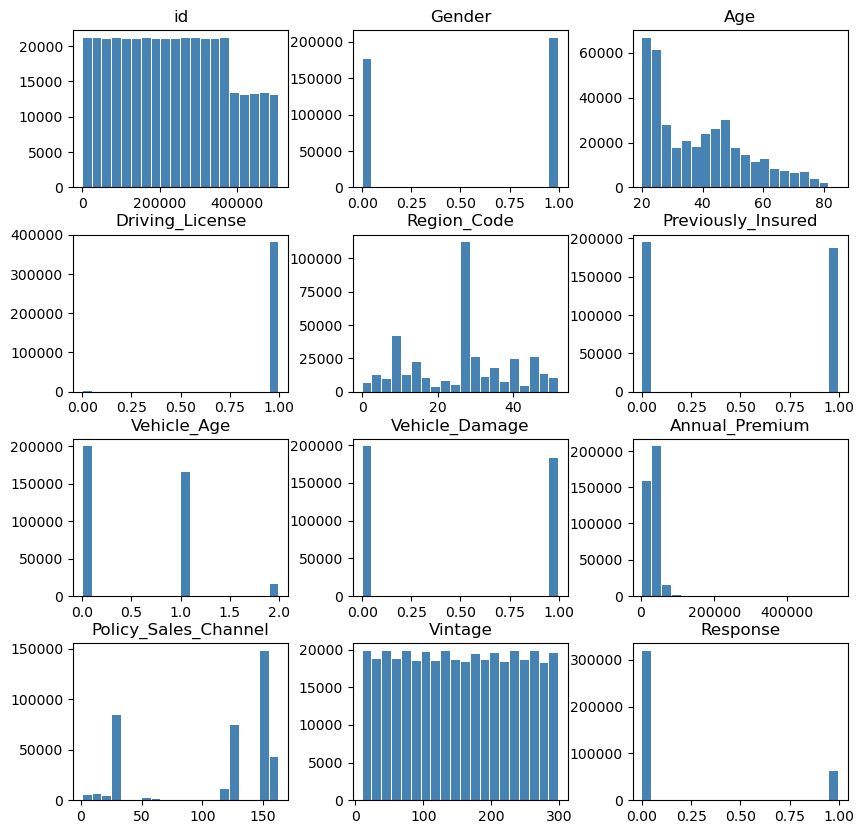

In [14]:
df_train.hist(column=df_train.columns, 
              color='steelblue', # many options, some to consider are
                            # ['aqua', 'red', 'gold', 'royalblue', 
                            #'darkorange', 'green', 'purple', 
                            #'steelblue', 'yellow', 'lime', 'magenta']
              #edgecolor='black', # color of the edge line for the bars
              figsize=(10,10), #(x axis and y axis in inches)
              bins=20, # number of bins to divide the data into
              rwidth=0.9, # width between each bin
              grid=False # to remove the grid for cleaner visualization
             )
plt.show()

## Zoom into Annual Premium Feature

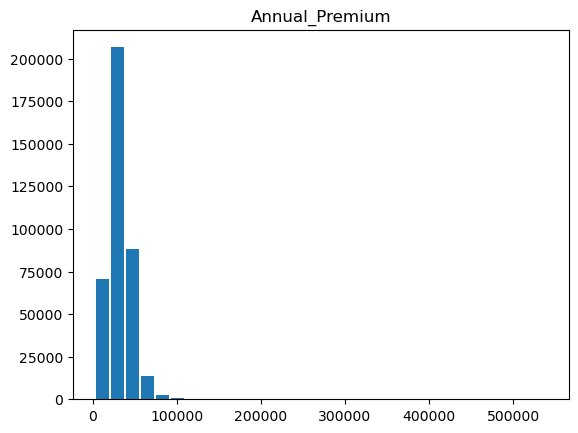

In [15]:
# Zoom into the Annual Premium for all the customers

df_train.hist(column=['Annual_Premium'], 
               bins = 30,
               rwidth=0.9, # width between each bin
               grid=False # to remove the grid for cleaner visualization
              )
plt.show()

Looks like Annual Premium feature is right skewed. We should remove the outliers for better predictions

In [16]:
# We know Annual Premium is skewed. Let's create a function to bin the values into a group
# We will convert the premium to a series of numbers. This will help us with better analysis
# For ex: 0-999 will be 1; 1,000 - 1,999 will be 2, .... until 99,000 - 99,999 will be 100
# all others values above 99,999 will be set to 999

#def bin_annual_premium(row_val):
#    if  row_val >= 100000:
#        return 999
#    else:
#        x = int((row_val // 1000) + 1)
#        return x
#    
#df_train['Bins'] = df_train['Annual_Premium'].apply(bin_annual_premium)
#
#df_train.groupby('Bins').count()['Annual_Premium']

In [17]:
# Based on the histogram, it looks like we can easily eliminate all the outliers beyond 100,000
df_train = df_train.loc[df_train['Annual_Premium'] < 100000]
df_train.shape

(381361, 12)

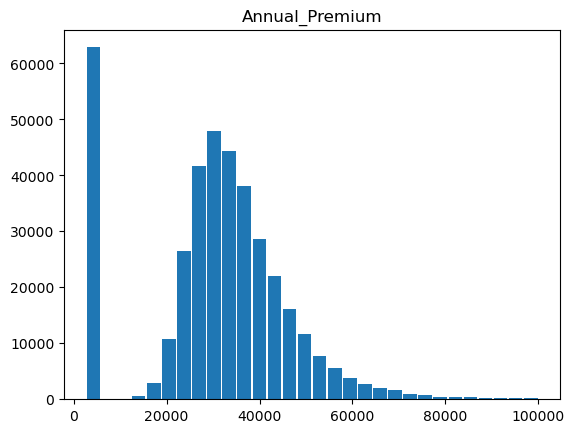

In [18]:
# Zoom into the Annual Premium for all the customers

df_train.hist(column=['Annual_Premium'], 
               bins = 30,
               rwidth=0.9, # width between each bin
               grid=False # to remove the grid for cleaner visualization
              )
plt.show()

## Plot Graphs - Boxplot

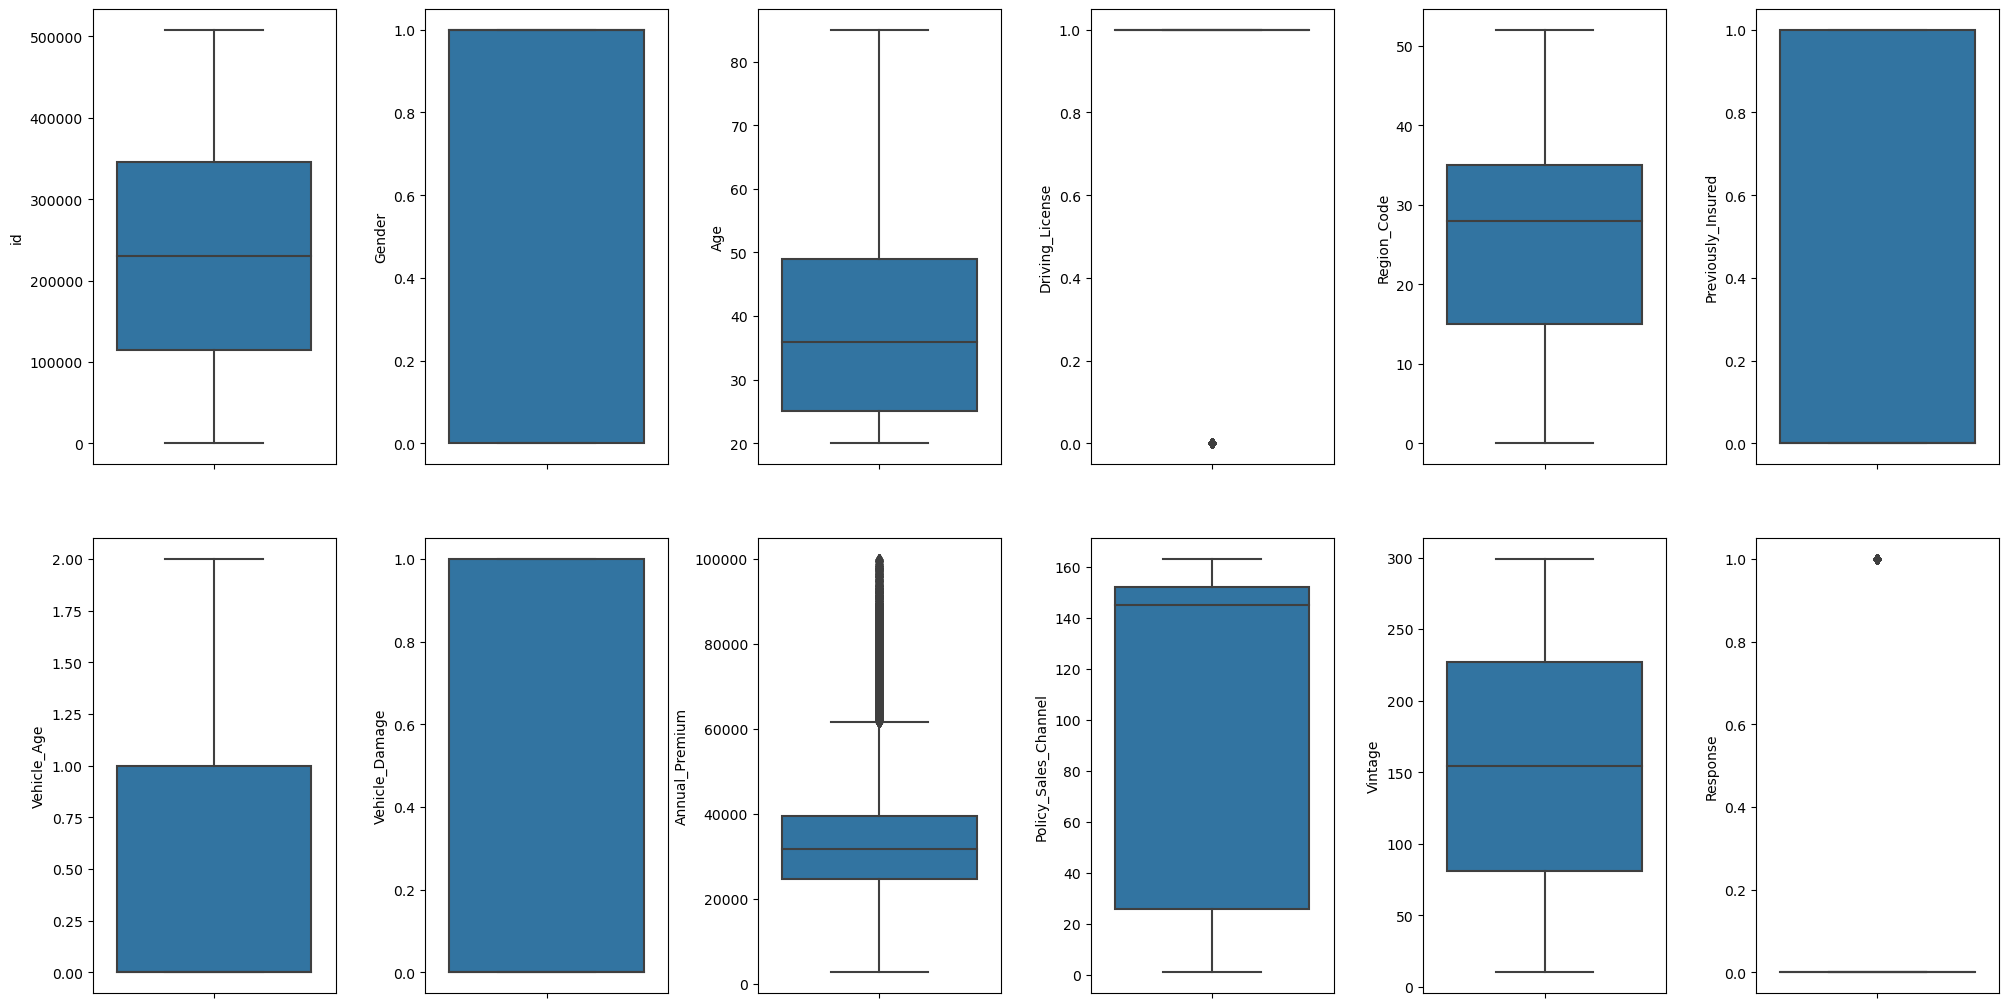

In [19]:
# We now have all the columns as numeric. So we can plot a boxplot on all columns.
# We have 12 columns. So let's split them into two rows of 6 columns to display the boxplot

fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_train.items():
    sns.boxplot(y=k, data=df_train, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

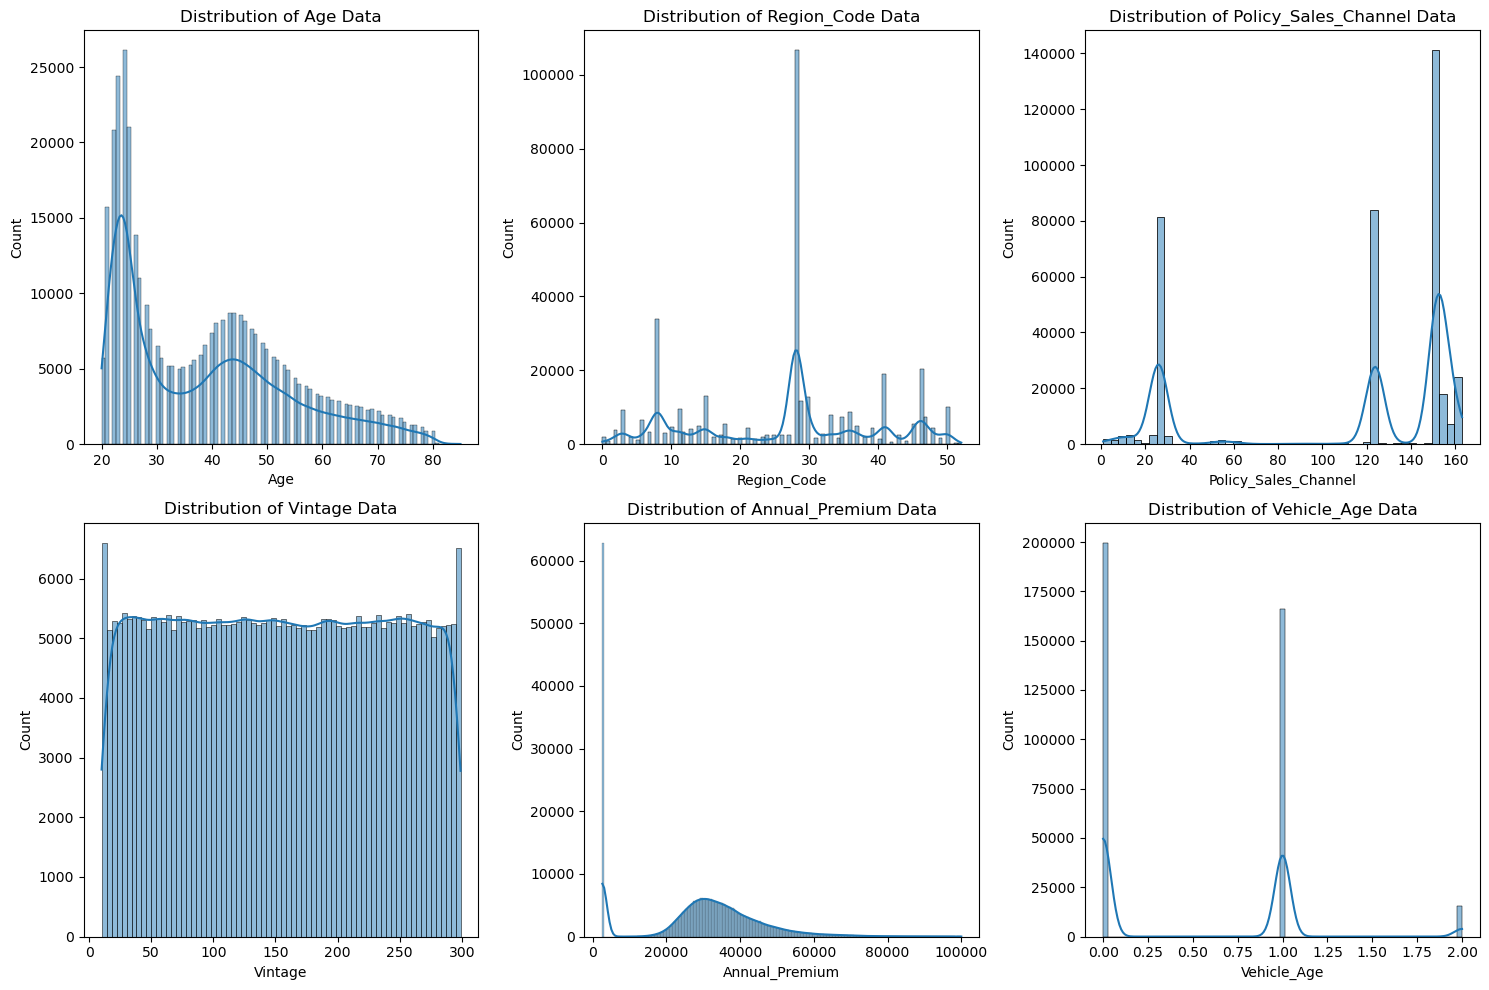

In [20]:
# Let's also plot the distribution grap and look at the skewness of the feature 
# using the Kernel Density Estimate (kde)

# We already know that some columns are not really skewed as they have very few values. 
# Let's exclude them from KDE analysis

# Columns being excluded are: 
# Id (each row is unique so it does not make sense to do distribution), 
# Gender (only two values, so no real distribution), 
# Driving License. It is either 0 or 1,
# Previously Insured. It is either 0 or 1
# Vehicle Damage. It is either 0 or 1
# Response. It is either 0 or 1

# This leaves us with only 5 columns. So we can plot these 3 in one row
# We have 4 features. Let's plot them on a 3x2 subplot

# Columns being plotted are:
# Age, Region_Code, Policy_Sales_Channel, Premium_Bin, Vehicle_Age, and Vintage

col_list = ['Age', 'Region_Code', 'Policy_Sales_Channel', 
            'Vintage', 'Annual_Premium','Vehicle_Age']

plt.figure(figsize=(15,10))
for i,col in enumerate(col_list,1):
    plt.subplot(2,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df_train[col],kde=True)
    plt.tight_layout()
    plt.plot()

## Plot Graphs - Violin Plot

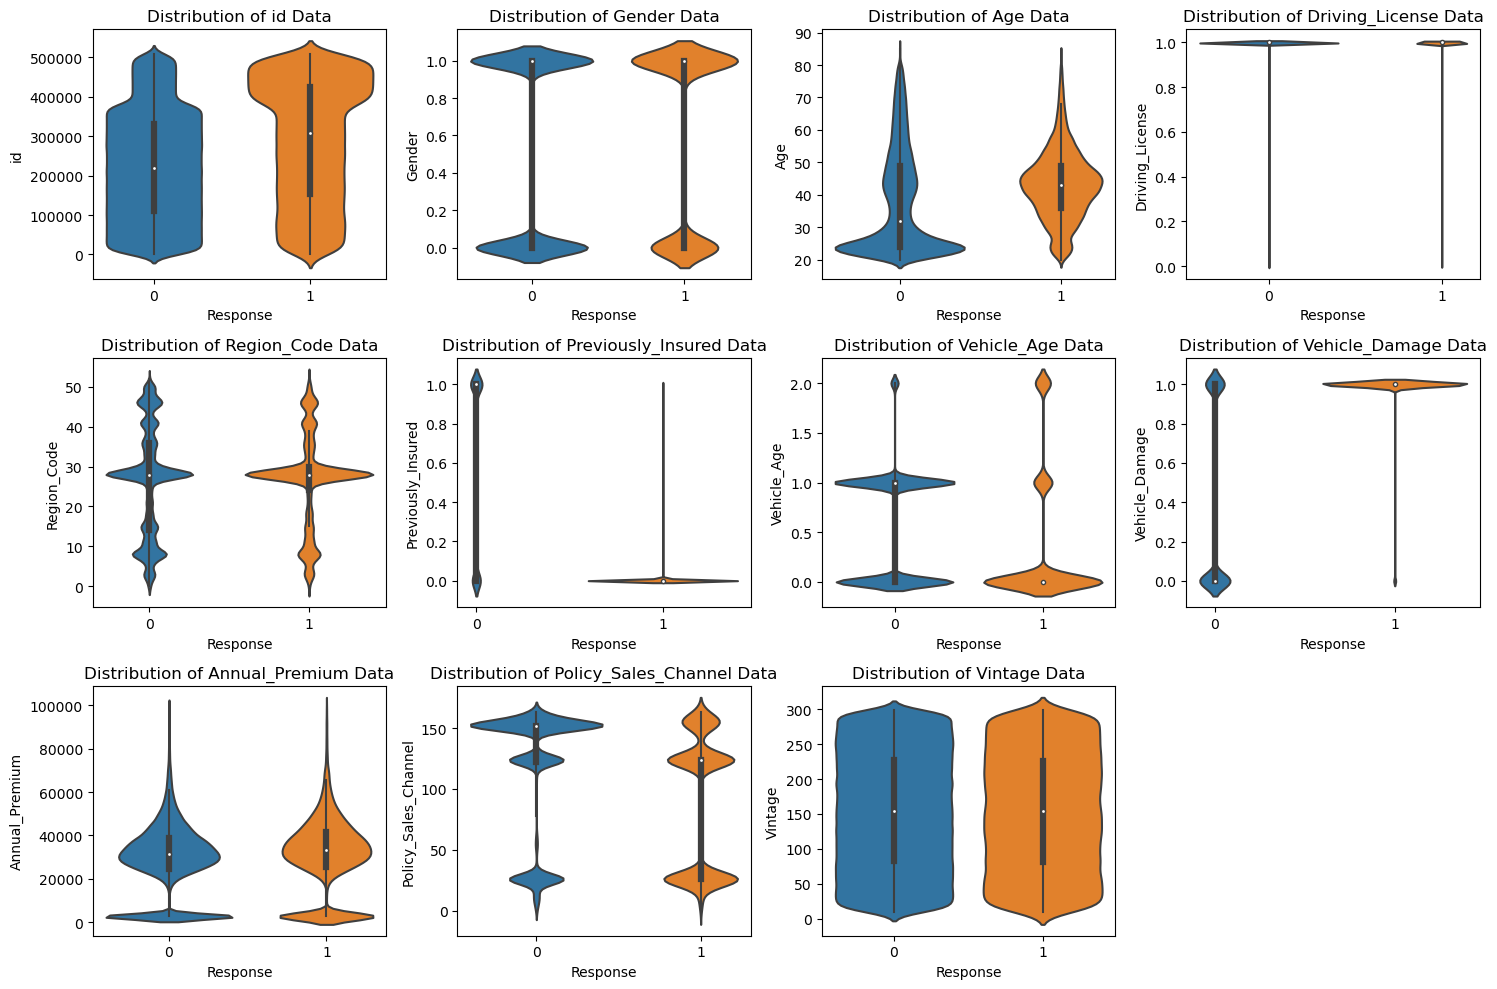

In [21]:
# We know that some features are contributing to the decision whether the customer will
# purchase vehicle insurance or now.
# Let's plot a Violin plot to see the data in comparison with 'Response' column
# We have 12 attributes with 1 attribute as 'Response'. 
# Let's plot the violin graph excluding the 'Response' column
# Plotting in a 3x4 matrix

plt.figure(figsize=(15,10))
for i,col in enumerate(df_train.columns,1):
    if col=='Response': continue
    plt.subplot(3,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.violinplot(data=df_train, x='Response', y=df_train[col])
    plt.tight_layout()
    plt.plot()

## Pairwise Correlation

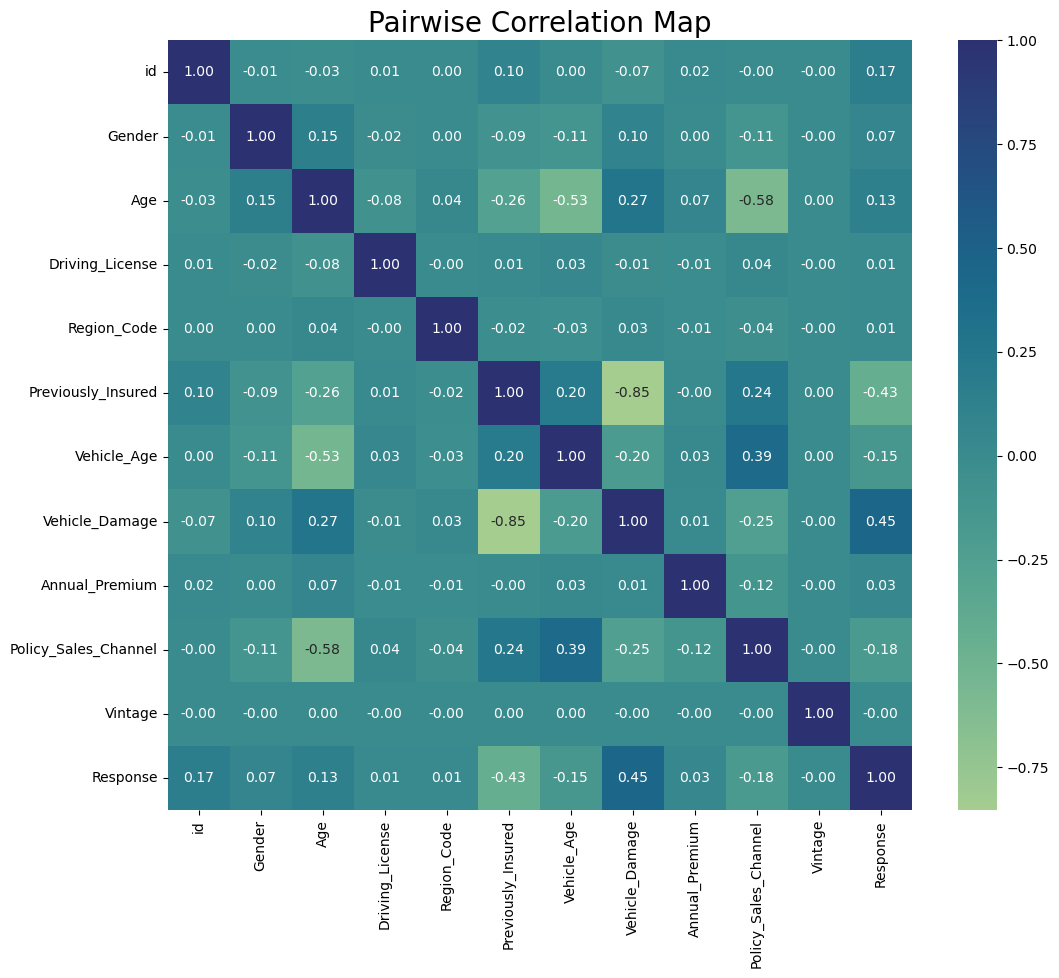

In [22]:
# Having analyzed all the data, let's revisit the pairwise correlation mapping 

plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(),annot=True,fmt='.2f', cmap='crest')
plt.title('Pairwise Correlation Map', size = 20)
plt.show()

## Numerical Features

In [23]:
# Identify all numerical features and categorical features

# Numerical Features:
x = df_train.drop(['Response'], axis=1)

numerical_features = x.select_dtypes(exclude=['object']).columns.tolist()
print('The numerical features in the Insurance Dataset are:')
print(numerical_features)

The numerical features in the Insurance Dataset are:
['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


## Machine Learning Models 

We will apply the following Machine Learning Models on the df_train dataset

Supervised Machine Learning Models:

- K-nearest neighbors (KNN) 
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Randomized Search CV
- Extra Tree Classifier
- Gaussian Naive Bayes 

## Function to Record and Print Scores

### Define a function to do the following:

- Capture the following key details:

- Model Name`
    - `Accuracy Score` : accuracy_score(y_true, y_pred_class)
    - `ROC AUC       ` : roc_auc_score(y_true, y_pred_pos)
    - `F1 Score      ` : f1_score(y_true, y_pred_class)
    
- Calculate the Confusion Matrix
- Plot the Confusion Matrix
- Print the Classification Report
- Print the Accuracy Score, ROC AUC Score, and F1 Score
- Plot the ROC AUC Curve for the model

In [24]:
# Define a function to do the following:

# Calculate the confusion matrix and the scores for the given model
# We will calculate the Confusion Matrix, Accuracy Score, ROC Score, and F1 Score

def record_and_print_scores(model_name, test_result, pred_result, proba_val):

    # Calculate the Confusion Matrix
    
    cm = confusion_matrix(test_result, pred_result)
    
    # Plot the Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    # Print the Classification Report
    print(classification_report(test_result, pred_result))

    # Print the Accuracy, ROC AUC, and F1 Scores
    x_acc_score = accuracy_score(test_result, pred_result)
    x_roc_acu = roc_auc_score(test_result, pred_result)
    x_f1_score = f1_score(test_result, pred_result)

    print(f'Results for {model_name}')
    print(f'Accuracy is: {x_acc_score:.2f}')
    print(f'ROC AUC is : {x_roc_acu:.2f}')
    print(f'F1 Score is : {x_f1_score:.2f}')

    # Capture the Accuracy, ROC AUC, and F1 Score to summarize in the end
    
    models.append(m_name) 
    accuracy_values.append(x_acc_score)
    roc_auc_values.append(x_roc_acu)
    f1_score_values.append(x_f1_score)
    
    # Plot the ROC Curve
    
    fpr, tpr, threshold = roc_curve(test_result, proba_val)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %roc_auc_values)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()